<a href="https://colab.research.google.com/github/Jahan08/Bioinformatics/blob/main/Single_cell_sequence_analysis_with_scanpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ScanPy

[ScanPy](https://scanpy.readthedocs.io/en/stable/) is a scalable toolkit for analyzing single-cell gene expression data. It includes methods for preprocessing, visualization, clustering, pseudotime and trajectory inference, differential expression testing, and simulation of gene regulatory networks. There are many advantage of using a Python-based platform to process scRNA-seq data including increased processing efficiency and running speed as well as seamless integration with machine learning frameworks.

[ANNDATA](https://github.com/theislab/anndata) was presented alongside ScanPy as a generic class for handling annotated data matrices that can deal with the sparsity inherent in gene expression data.

This tutorial is largely adapted from the original tutorials which can be found in Scanpy's [read the docs](https://scanpy.readthedocs.io/en/stable/) and from [this](https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=533160543ee890ef3fad377a21a1ba45cda65882&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f416363696f2f616e616c7973696e672d7363524e417365712d776974682d7363616e70792d616e642d62657363612f353333313630353433656538393065663366616433373761323161316261343563646136353838322f7363616e70792d7475746f7269616c2d336b50424d432e6970796e62&logged_in=false&nwo=Accio%2Fanalysing-scRNAseq-with-scanpy-and-besca&path=scanpy-tutorial-3kPBMC.ipynb&platform=android&repository_id=262068634&repository_type=Repository&version=98) notebook.

## Colab

This tutorial and the rest in this sequence can be done in Google colab. If you'd like to open this notebook in colab, you can use the following link.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/deepchem/deepchem/blob/master/examples/tutorials/Scanpy.ipynb)

Make sure you've installed Scanpy:

In [ ]:
!pip install scanpy python-igraph leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=e4ab1db02ad7df764251fdcf83003bd2b642e6f8674c96c6a6e03f9acef4eb26
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for session-info: filename=session_inf

In [ ]:
# import necessary packages
import numpy as np
import pandas as pd
import scanpy as sc

In [ ]:
sc.settings.verbosity = 3   # verbosity: errors (0), warnings (1), info (2), hints (3)

In [ ]:
# see what package versions you have installed
sc.logging.print_versions()
# customize resolution and color of your figures
sc.settings.set_figure_params(dpi=80, facecolor='white')

-----
anndata     0.9.2
scanpy      1.9.5
-----
PIL                 9.4.0
astunparse          1.6.3
backcall            0.2.0
certifi             2023.07.22
cffi                1.15.1
cloudpickle         2.2.1
cupy                11.0.0
cupy_backends       NA
cupyx               NA
cycler              0.10.0
cython_runtime      NA
dask                2023.8.1
dateutil            2.8.2
debugpy             1.6.6
decorator           4.4.2
defusedxml          0.7.1
dot_parser          NA
exceptiongroup      1.1.3
fastrlock           0.8.2
google              NA
h5py                3.9.0
httplib2            0.22.0
igraph              0.10.8
iniconfig           NA
ipykernel           5.5.6
ipython_genutils    0.2.0
jinja2              3.1.2
joblib              1.3.2
kiwisolver          1.4.5
leidenalg           0.10.1
llvmlite            0.39.1
markupsafe          2.1.3
matplotlib          3.7.1
matplotlib_inline   0.1.6
mpl_toolkits        NA
mpmath              1.3.0
natsort             8.

In [ ]:
# download the test data for this tutorial
!mkdir data
!wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O data/pbmc3k_filtered_gene_bc_matrices.tar.gz
!cd data

!mkdir write

mkdir: cannot create directory ‘data’: File exists
--2023-09-21 20:15:43--  http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173, 2606:4700::6812:ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz [following]
--2023-09-21 20:15:43--  https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7621991 (7.3M) [application/x-tar]
Saving to: ‘data/pbmc3k_filtered_gene_bc_matrices.tar.gz’

data/pbmc3k_filtere 100%[===================>]   7.27M  --.-KB/s    in 0.07s   

2023-09-21 20:15:43

In [ ]:
!tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz

tar (child): pbmc3k_filtered_gene_bc_matrices.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [ ]:
results_file = 'write/pbmc3k.h5ad' # the file that will store the analysis results

In [ ]:
adata = sc.read_10x_mtx(
    'data/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... writing an h5ad cache file to speedup reading next time


See [anndata-tutorials/getting-started] for a more comprehensive introduction to AnnData.

In [ ]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [ ]:
# look at what the AnnData object contains
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

# Pre-processing

## Check for highly expressed genes

Show genes that yield the highest fraction of counts in each single cell, across all cells. The `sc.pl.highest_expr_genes` command normalizes counts per cell, and plots the genes that are most abundant in each cell.

normalizing counts per cell
    finished (0:00:00)


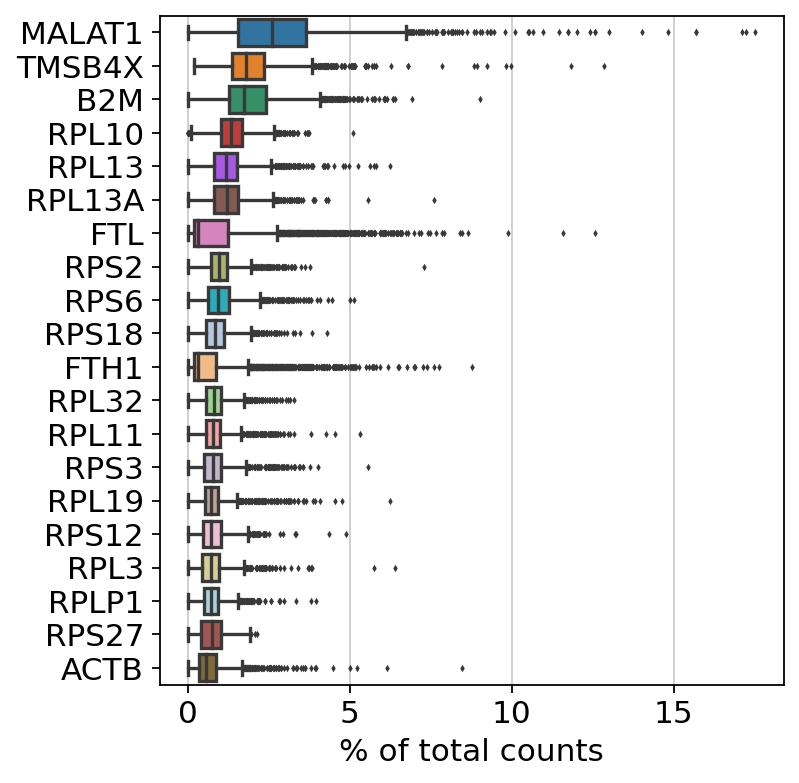

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20, )

Note that MALAT1, a non-coding RNA that is known to be extremely abundant in many cells, ranks at the top.

## Basic filtering: remove cells and genes with low expression or missing values.

In [ ]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 19024 genes that are detected in less than 3 cells


## Check mitochondrial genes for Quality Control

Let’s assemble some information about mitochondrial genes, which are important for quality control.

Citing from “Simple Single Cell” workflows (Lun, McCarthy & Marioni, 2017):

High proportions are indicative of poor-quality cells (Islam et al. 2014; Ilicic et al. 2016), possibly because of loss of cytoplasmic RNA from perforated cells. The reasoning is that mitochondria are larger than individual transcript molecules and less likely to escape through tears in the cell membrane.

With `pp.calculate_qc_metrics`, we can compute many metrics very efficiently.

In [ ]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

A violin plot of some of the computed quality measures:

- the number of genes expressed in the count matrix
- the total counts per cell
- the percentage of counts in mitochondrial genes

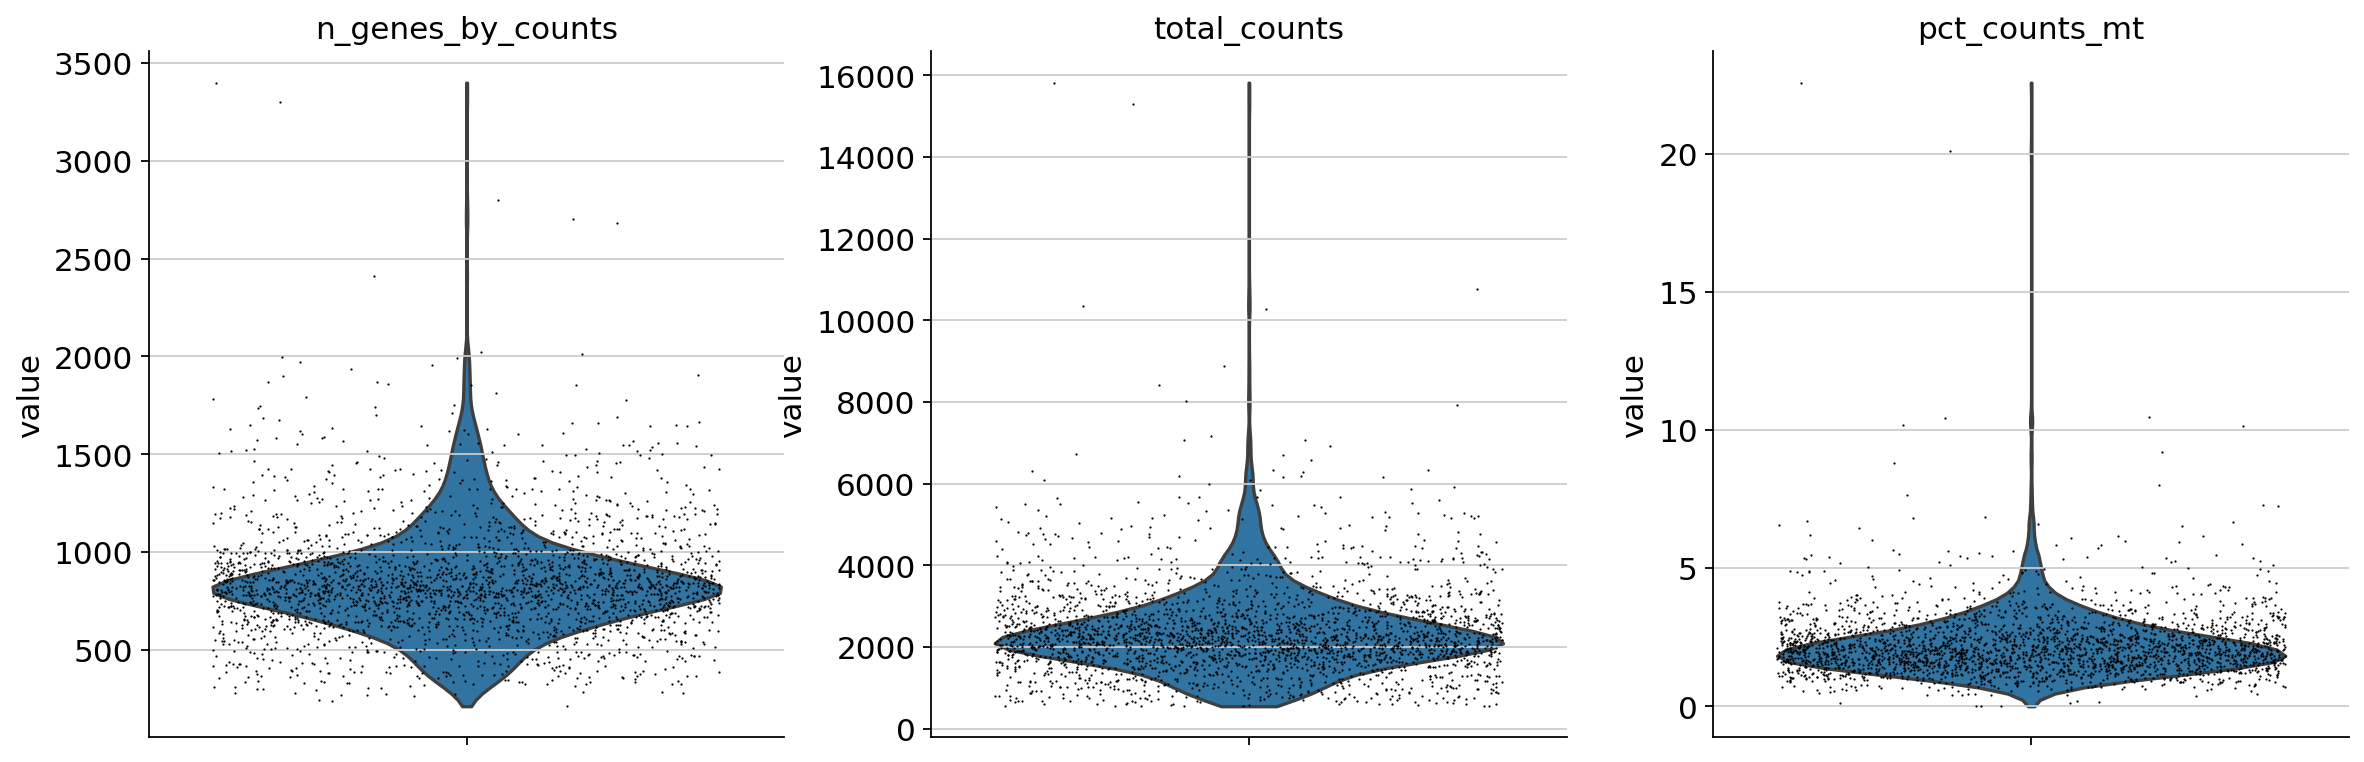

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

Remove cells that have too many mitochondrial genes expressed or too many total counts. High proportions of mitochondrial genes indicate poor-quality cells, potentially because of loss of cytoplasmic RNA from perforated cells.

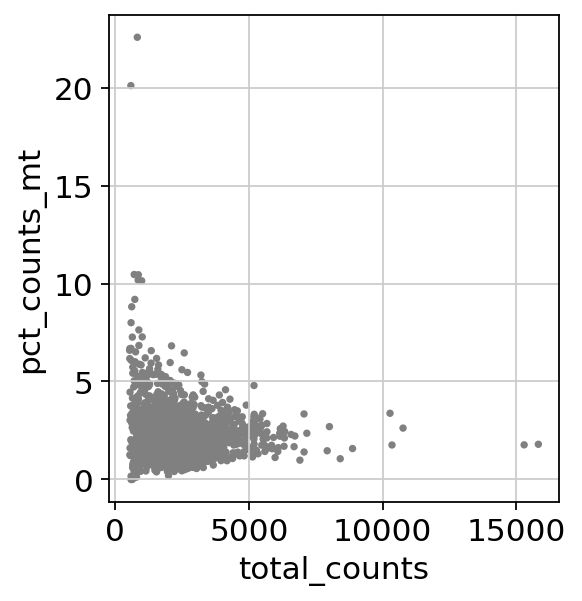

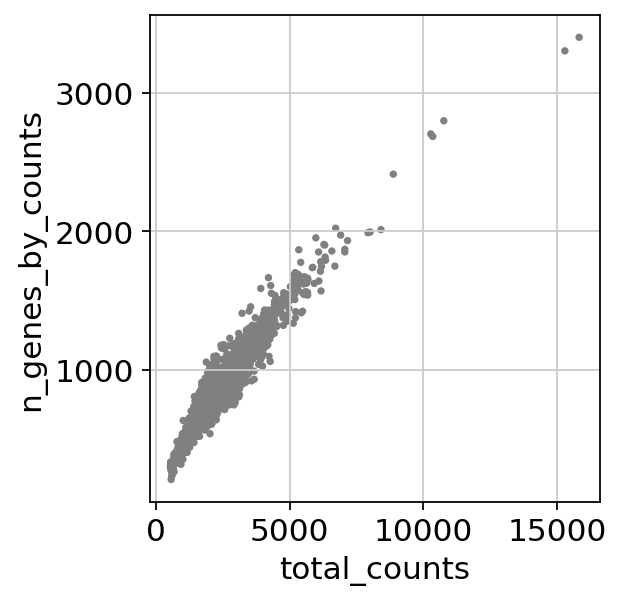

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

## Filter data based on QC
Check current datset and filter it by slicing the AnnData object.

In [ ]:
print(adata)

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'


In [ ]:
# slice the adata object so you only keep genes and cells that pass the QC
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]
print(adata)

View of AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'


## Data normalization
To correct differences in library sizes across cells, normalize the total read count of the data matrix to 10,000 reads per cell so that counts become comparable among cells.

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Log transform the data for later use in differential gene expression as well as in visualizations. The natural logarithm is used, and `log1p` means that an extra read is added to cells of the count matrix as a pseudo-read. See [here](https://www.biogazelle.com/seven-tips-bio-statistical-analysis-gene-expression-data) for more information on why log scale makes more sense for genomic data.

In [ ]:
sc.pp.log1p(adata)

## Identify highly-variable genes.
The function `sc.pp.highly_variable_genes` can detect marker genes that can help us identify cells based on a few manually set parameters, including mininum mean expression, maximum mean expression, and minimum dispersion. We will focus our analysis on such genes.

In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


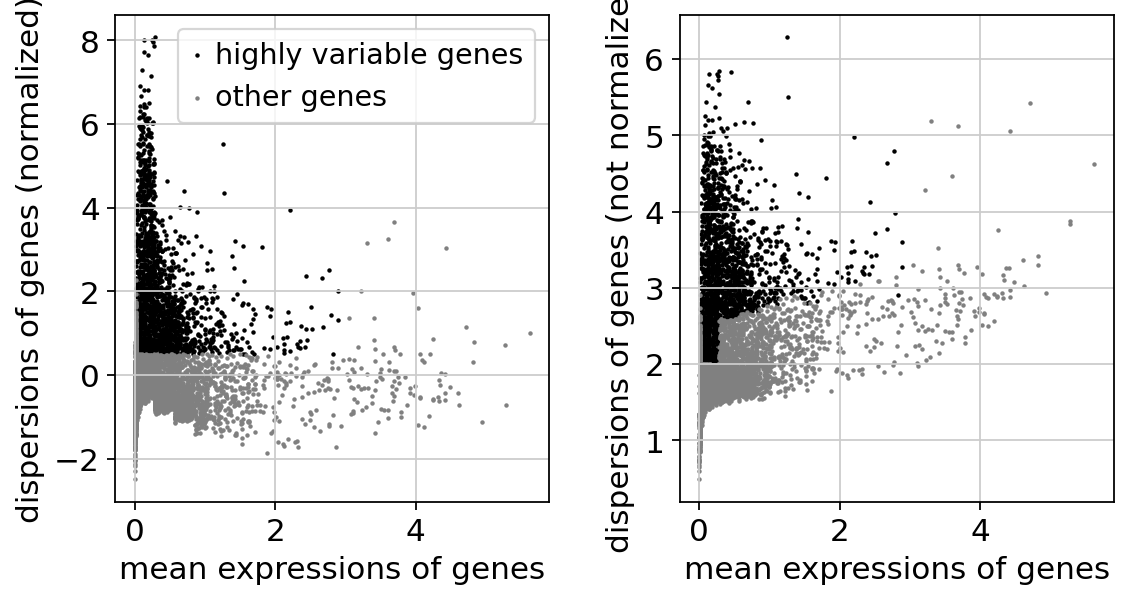

In [ ]:
# visualize the highly variable genes with a plot
sc.pl.highly_variable_genes(adata)

Set the `.raw` attribute of the AnnData object to the normalized and logarithmized raw gene expression for later use in differential testing and visualizations of gene expression. This simply freezes the state of the AnnData object.

In [ ]:
adata.raw = adata

Filter the `adata` object so that only genes that are highly variable are kept.

In [ ]:
adata = adata[:, adata.var.highly_variable]

## Correct for the effects of counts per cell and mitochondrial gene expression

Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. This can consume some memory and take some time because the input data is sparse.

In [ ]:
sc.pp.regress_out(adata, ['n_genes_by_counts', 'pct_counts_mt'])

regressing out ['n_genes_by_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:08)


## Center the data to zero and scale to unit variance

Use `sc.pp.scale` to center the average expression per gene to zero. Here we are also clipping scaled values that exceed standard deviation of 10.

In [ ]:
sc.pp.scale(adata, max_value=10)

## Dimension reduction with PCA

We first use principal component analysis (PCA), a linear dimention-reduction technique, to reveal the main axes of variation and denoise the data.

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


We can make a scatter plot in the PCA coordinates, but we will not use that later on.

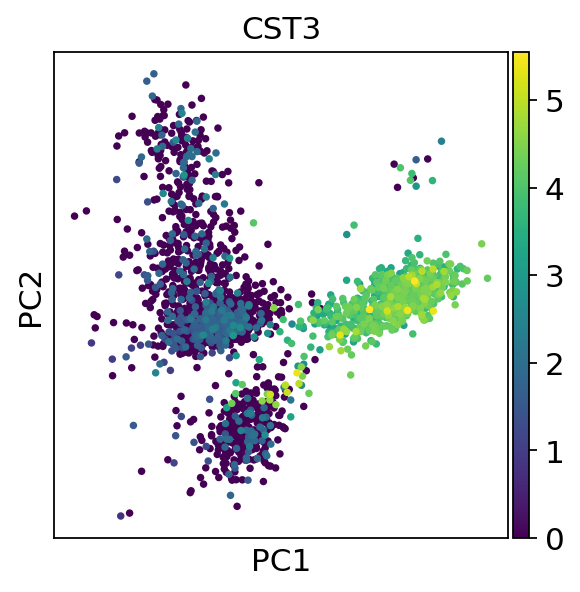

In [ ]:
sc.pl.pca(adata, color="CST3")

The variance ratio plot lists contributions of individual principal components (PC) to the total variance in the data. This piece of information helps us to choose an appropriate number of PCs in order to compute the neighborhood relationships between the cells, for instance, using the clustering method Louvain `sc.tl.louvain()` or the embedding method tSNE `sc.tl.tsne()` for dimension-reduction.

According to the authors of Scanpy, a rough estimate of the number of PCs does fine.

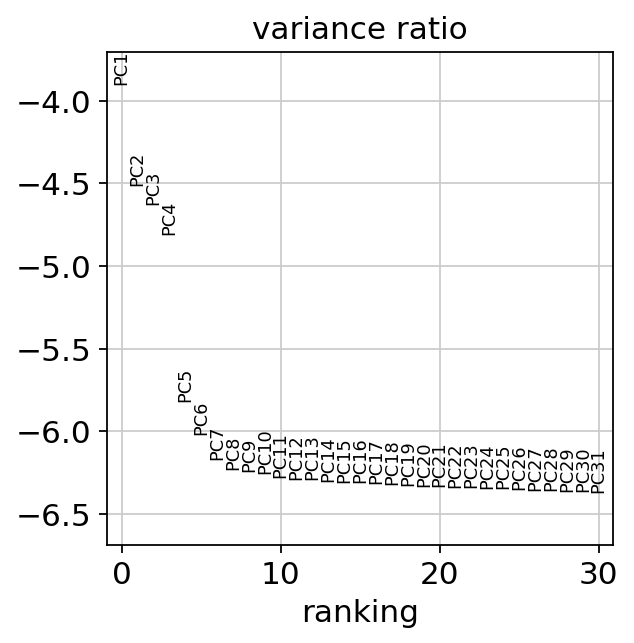

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True)

Save the result up to PCA analysis.

In [ ]:
! mkdir -p write
adata.write(results_file)

Note that our adata object has following elements: observations annotation (obs), variables (var), unstructured annotation (uns), multi-dimensional observations annotation (obsm), and multi-dimensional variables annotation (varm). The meanings of these parameters are documented in the anndata package, available at [anndata documentation](https://anndata-tutorials.readthedocs.io/en/latest/getting-started.html).

In [ ]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

## Computing and Embedding the neighborhood graph

Use the PCA representation of the data matrix to compute the neighborhood graph of cells.

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:19)


The auhours of Scanpy suggest embedding the graph in two dimensions using UMAP ([McInnes et al., 2018](https://arxiv.org/abs/1802.03426)). UMAP is potentially more faithful to the global connectivity of the manifold than tSNE, i.e., it better preserves trajectories.

In [ ]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


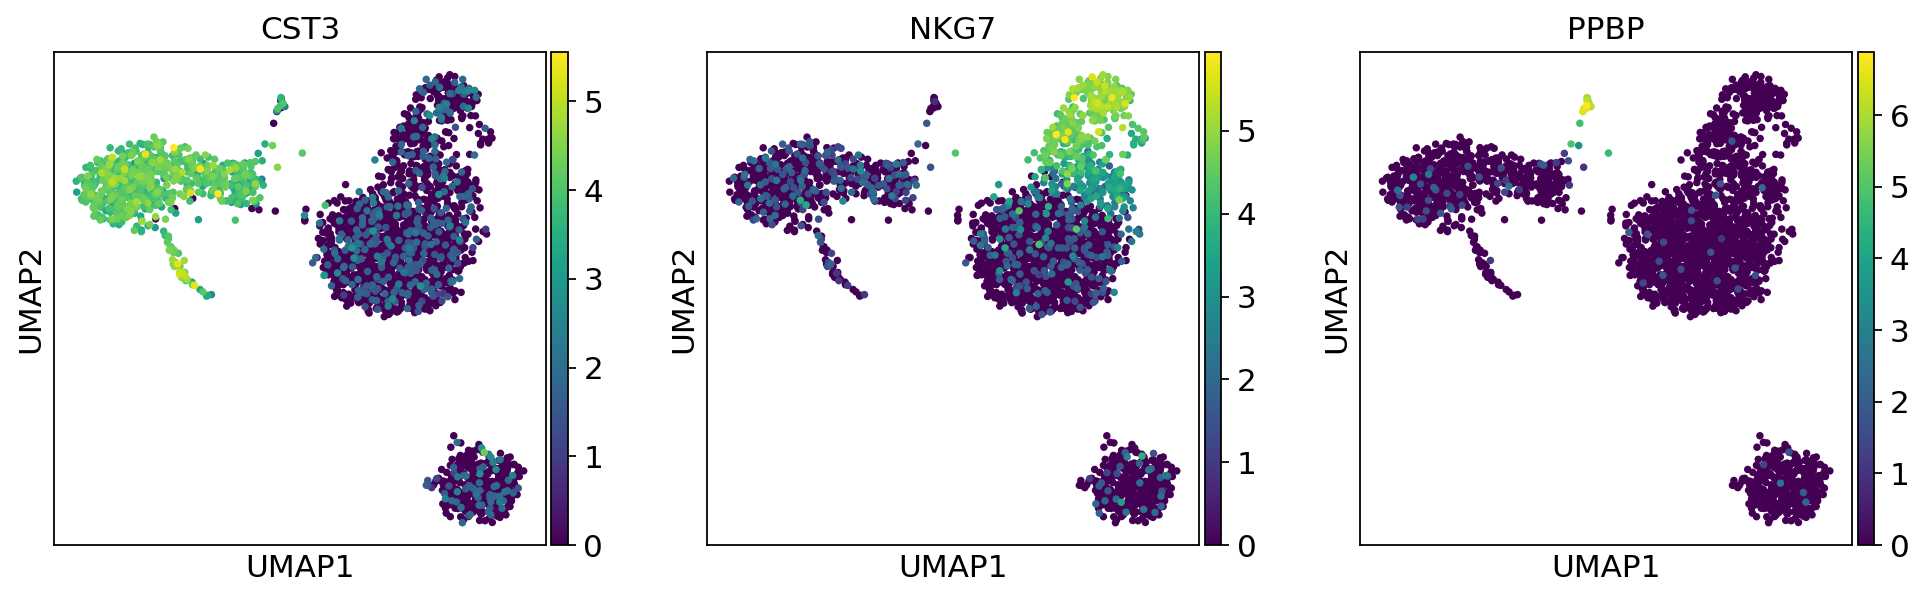

In [ ]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

As we set the `.raw` attribute of adata, the previous plots showed the “raw” (normalized, logarithmized, but uncorrected) gene expression. You can also plot the scaled and corrected gene expression by explicitly stating that you don’t want to use `.raw`.

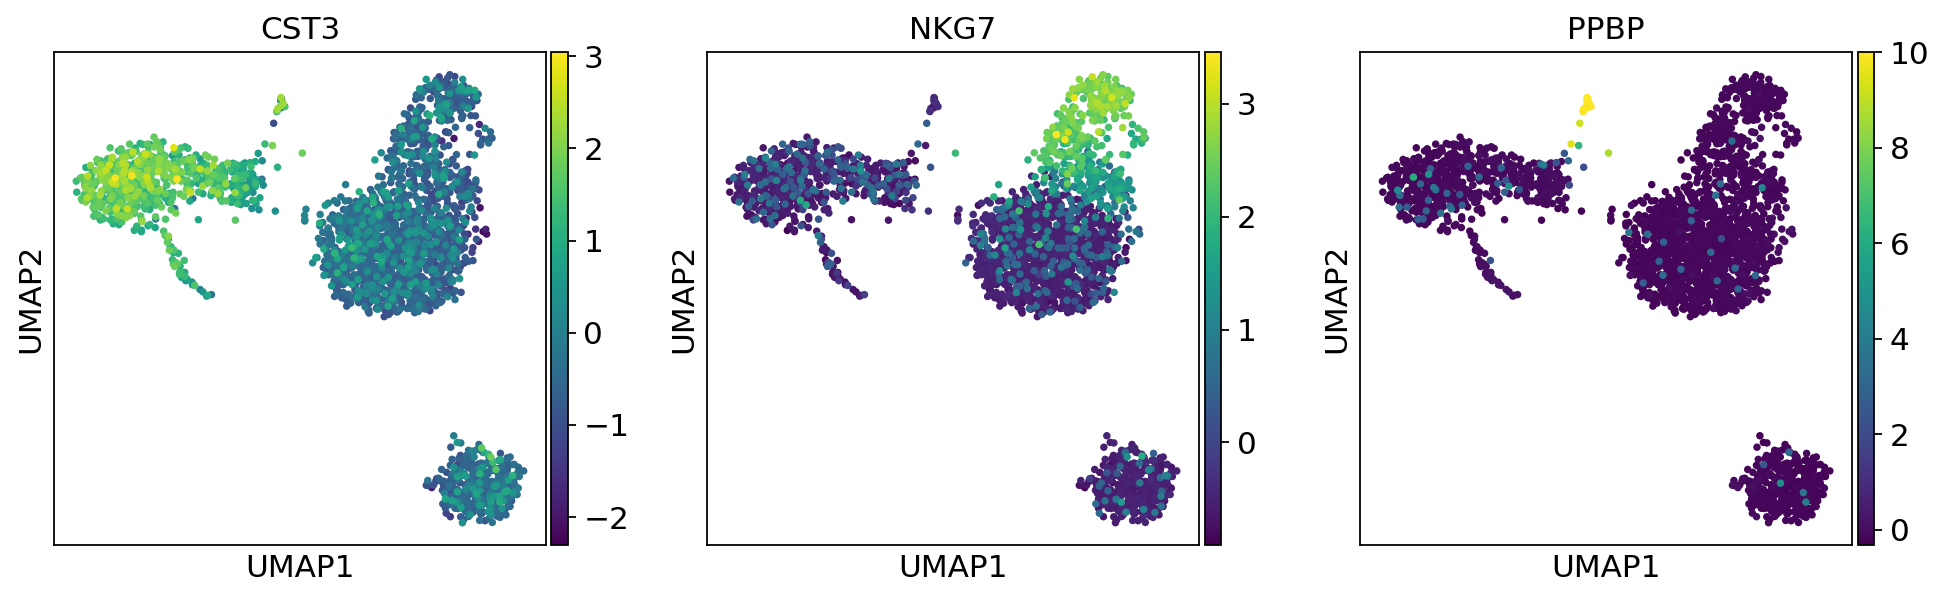

In [ ]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)

In some ocassions, you might still observe disconnected clusters and similar connectivity violations. They can usually be remedied by running:

In [ ]:
#sc.tl.paga(adata)
pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
tl.umap(adata, init_pos='paga')

NameError: ignored

## Clustering the neighborhood graph

As with Seurat and many other frameworks, we recommend the Leiden graph-clustering method (community detection based on optimizing modularity) by [Traag *et al.* (2018)](https://arxiv.org/abs/1810.08473). Note that Leiden clustering directly clusters the neighborhood graph of cells, which we already computed in the previous section. Compared with the Louvain algorithm, the Leiden algorithm yields communities that are guaranteed to be connected. When applied iteratively, the Leiden algorithm converges to a partition in which all subsets of all communicities are locally optimally assigned. Last but not least, it runs faster.

In [ ]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


Plot the clusters using `sc.pl.umap`. Note that the color parameter accepts both individual genes and the clustering method (leiden in this case).

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


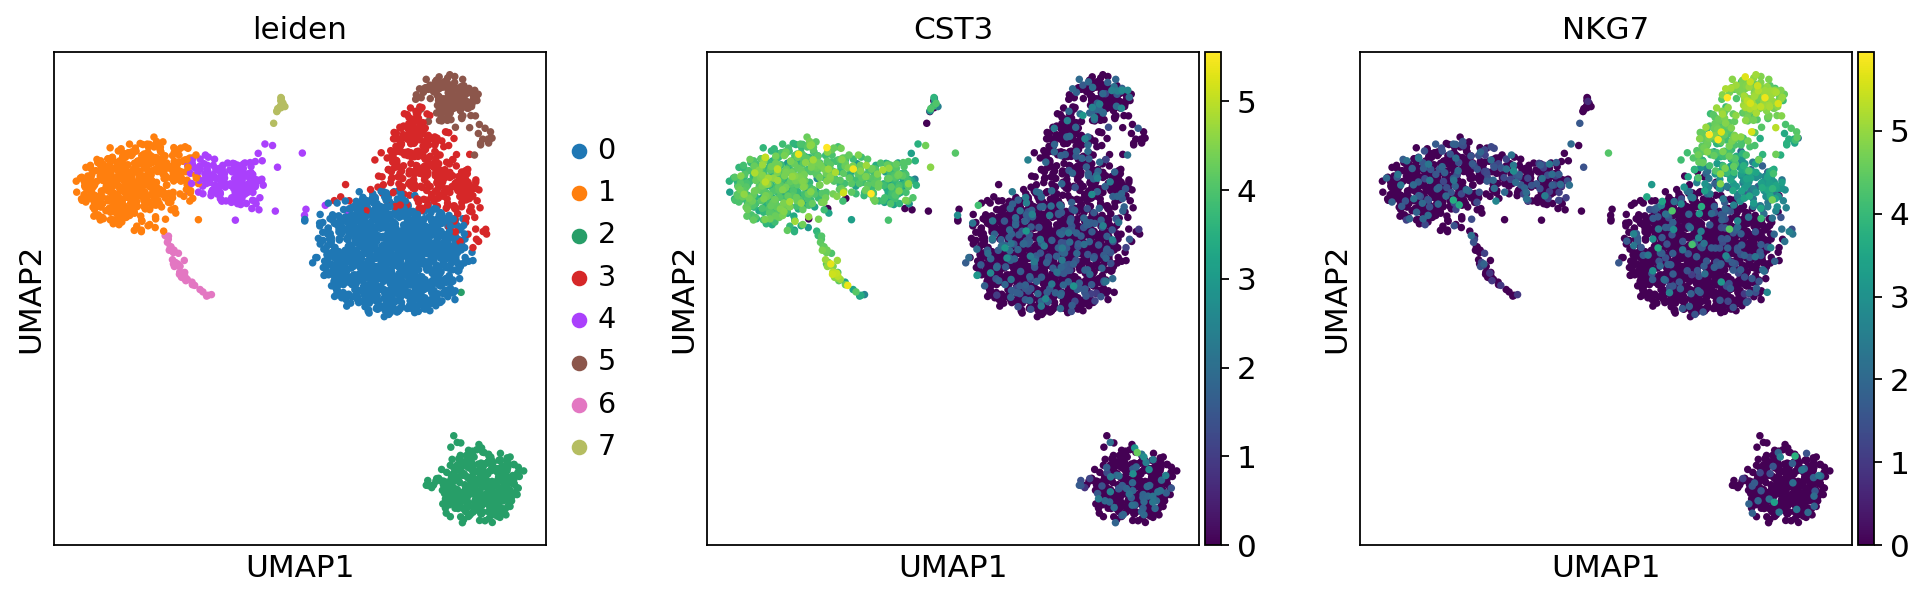

In [ ]:
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])

We save the result again.

In [ ]:
adata.write(results_file)

## Identifying marker genes

Compute a ranking for the highly differential genes in each cluster. For this, by default, the `.raw` attribute of AnnData is used in case it has been initialized before. The simplest and fastest method to do so is the t-test. Other methods include Wilcoxon rank-sum (Mann-Whitney-U) test, MAST, limma, DESeq2, and diffxpy by the Theis lab. The authours of Scanpy reccomend using the Wilcoxon rank-sum test in publications.

## The Wilcoxon's test

For simplicity, we start with the Mann-Whitney-U test. The null hypothesis is that the rank of a gene in a cluster is the same as its rank in all cells. The alternative hypothesis is that the rank of a gene in a cluster is much higher than its rank in all cells (one-sided). The function `sc.tl.rank_genes_groups` performs the test, and `sc.pl.rank_genes_groups` plots the top genes.

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


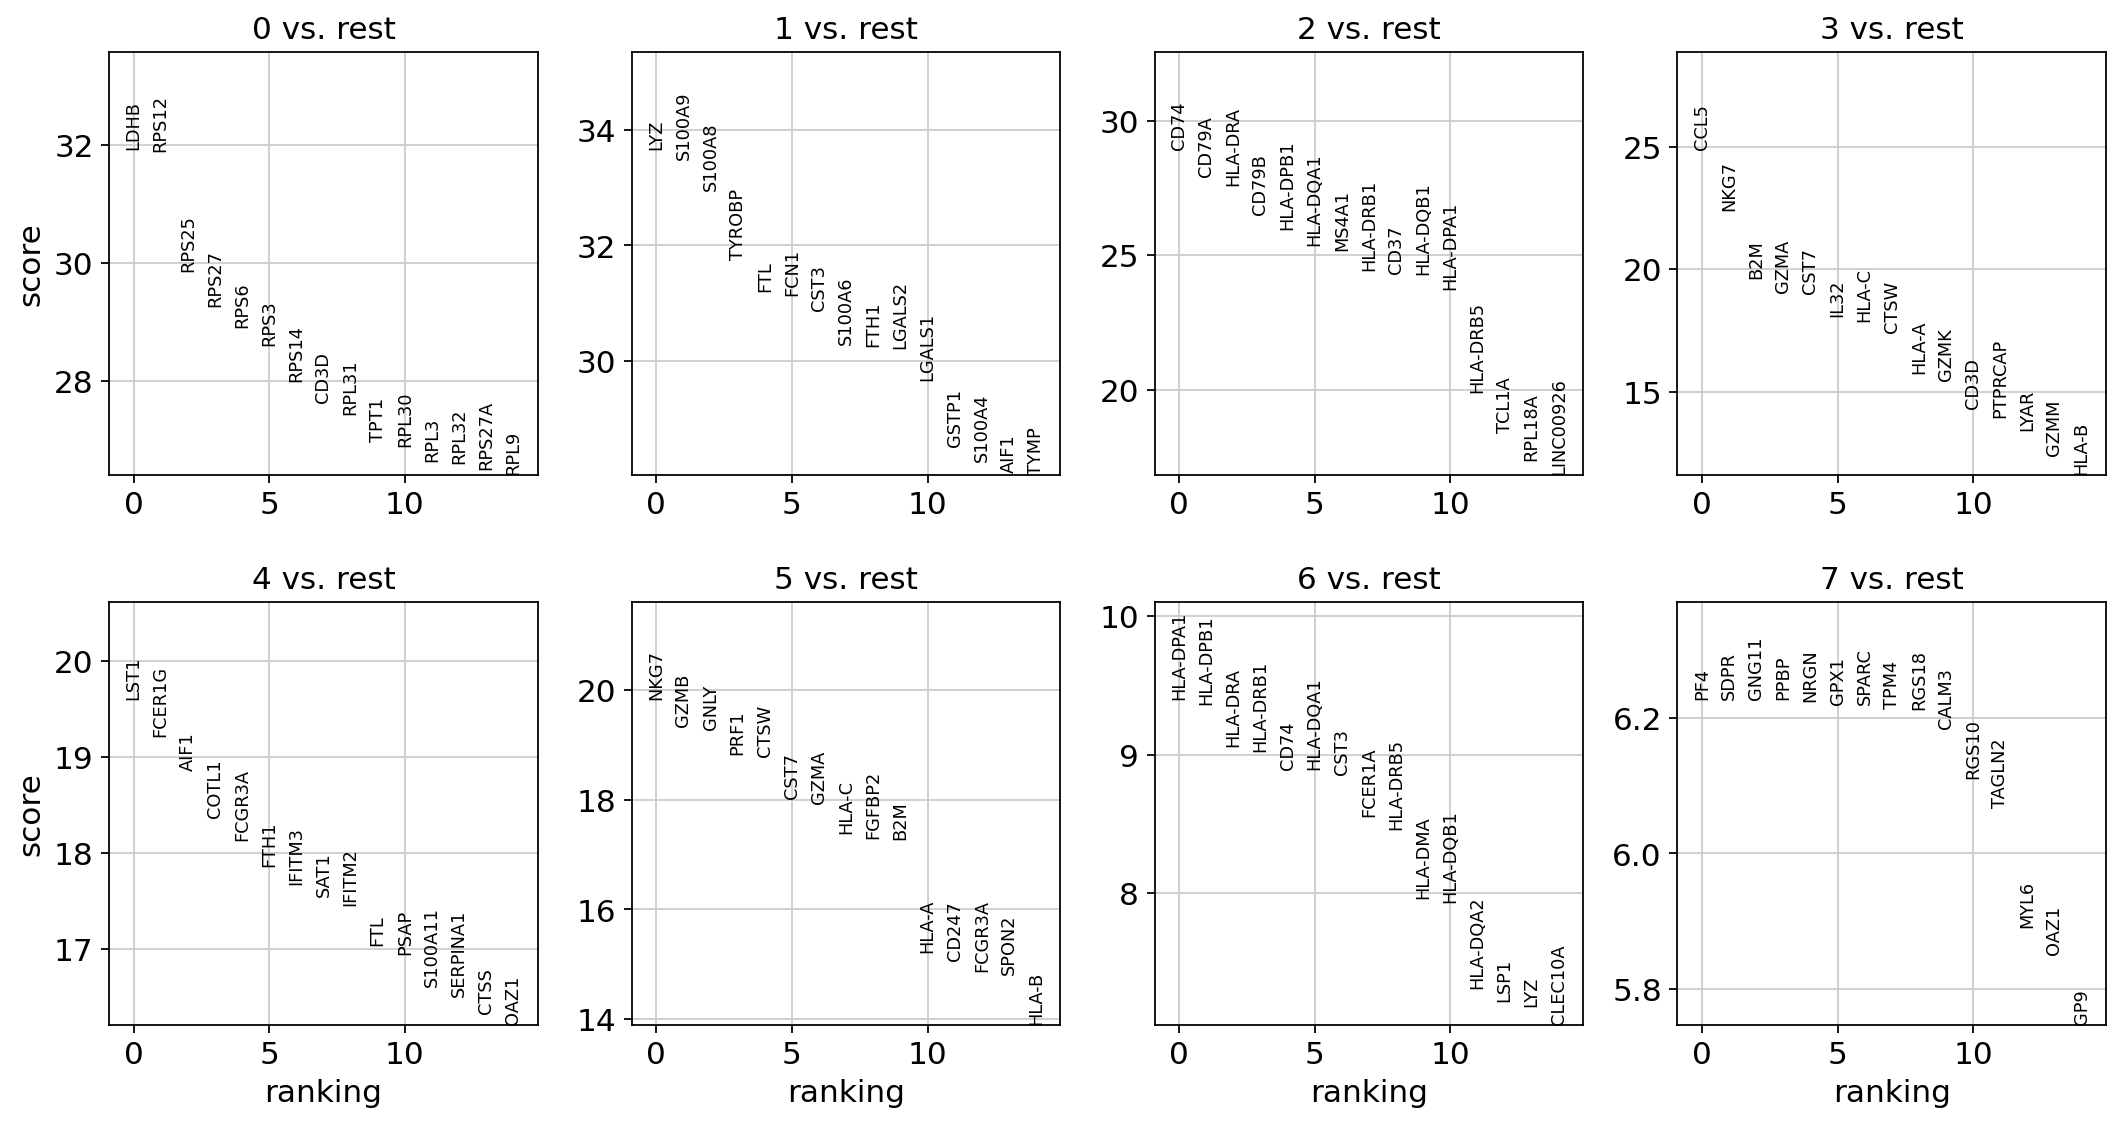

In [ ]:
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False)

In [ ]:
sc.settings.verbosity = 2  # reduce the verbosity

In [ ]:
adata.write(results_file) # write the output to the results file

## The Student's t-test

An alternative to the non-parametric Wilcoxon test is the t-test.

ranking genes
    finished (0:00:00)


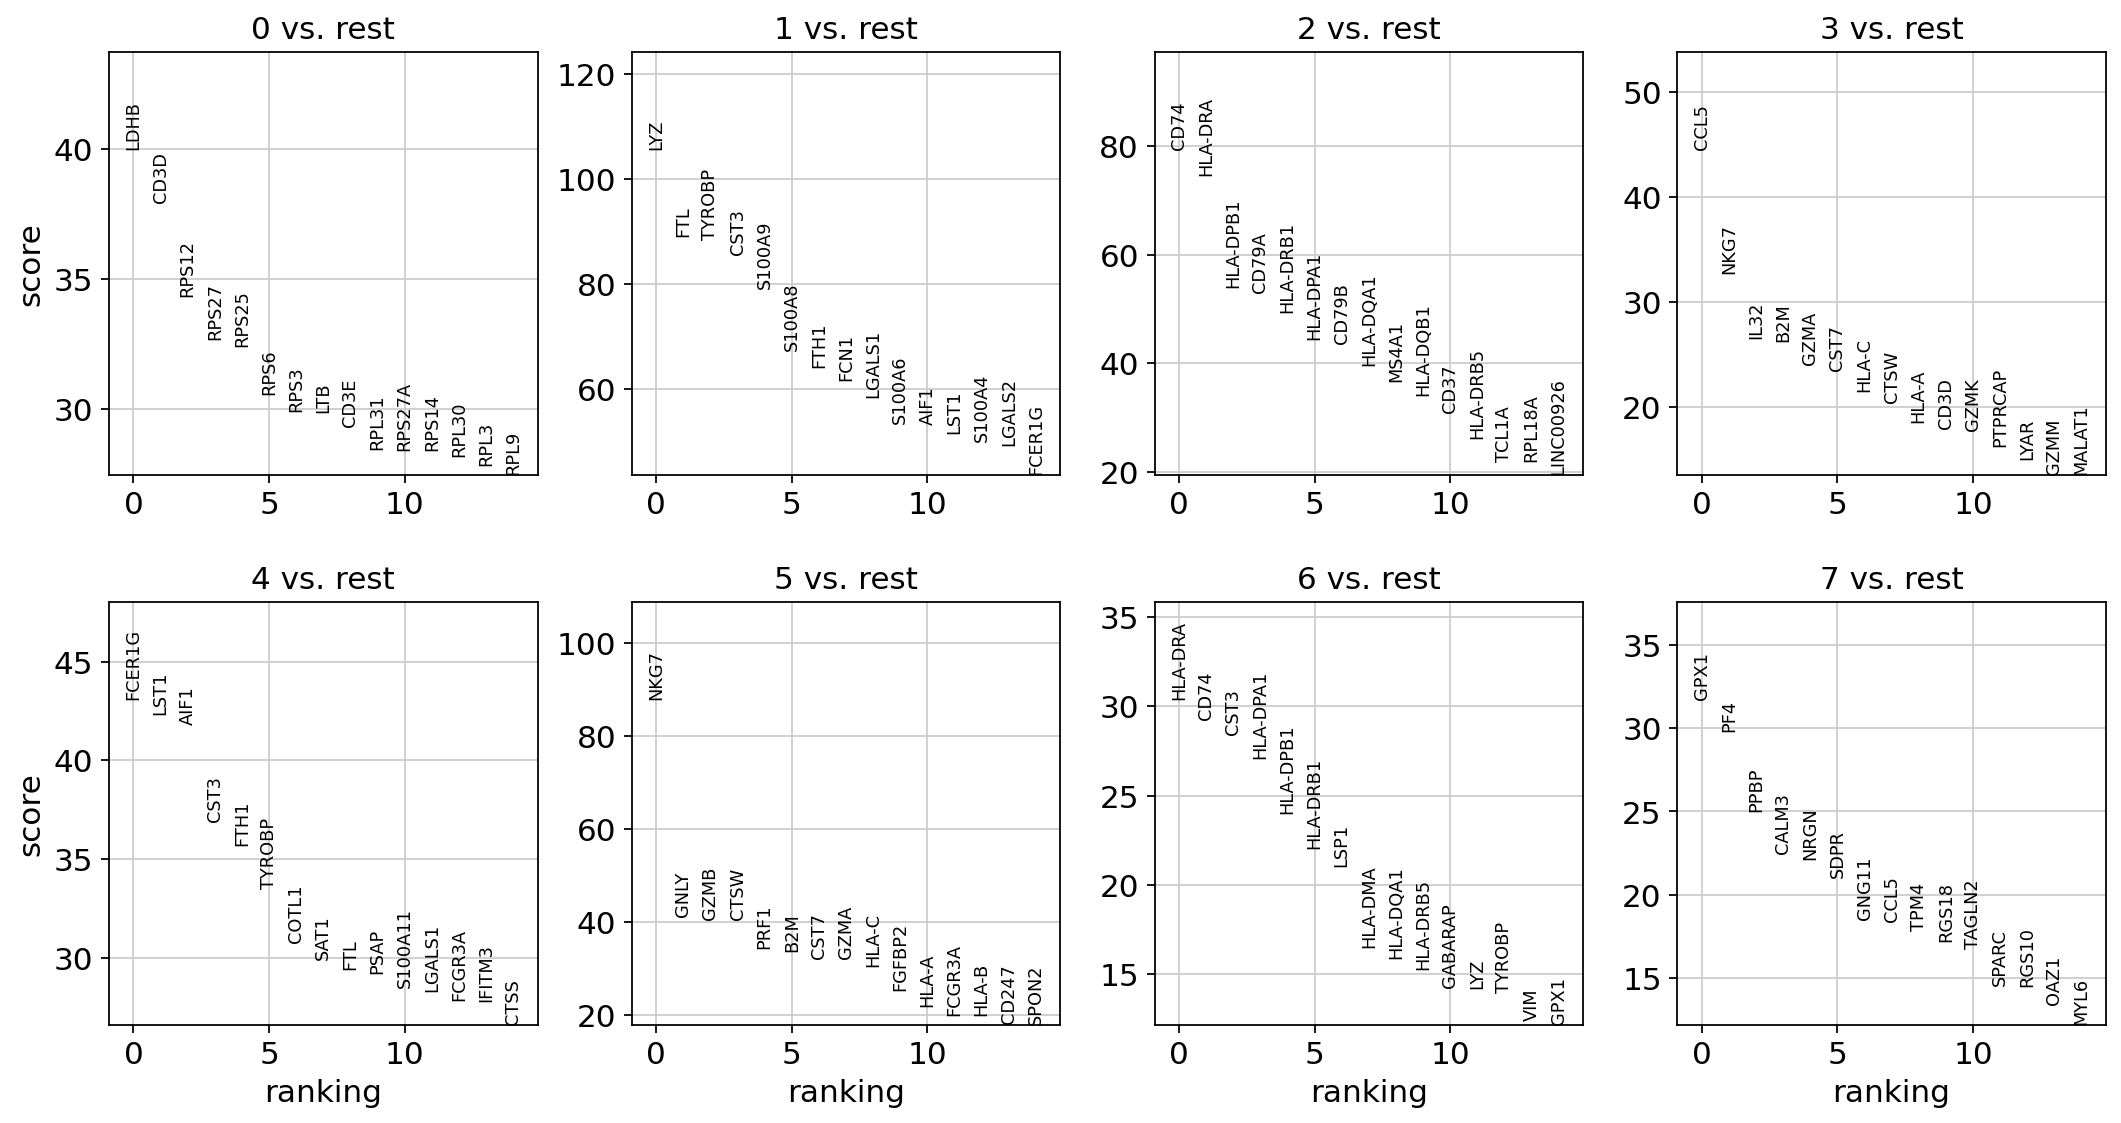

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False)

As an alternative, let us rank genes using logistic regression. For instance, this has been suggested by Natranos et al. (2018). The essential difference is that here, we use a multi-variate appraoch whereas conventional differential tests are uni-variate. Clark et al. (2014) has more details.

ranking genes
    finished (0:00:16)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


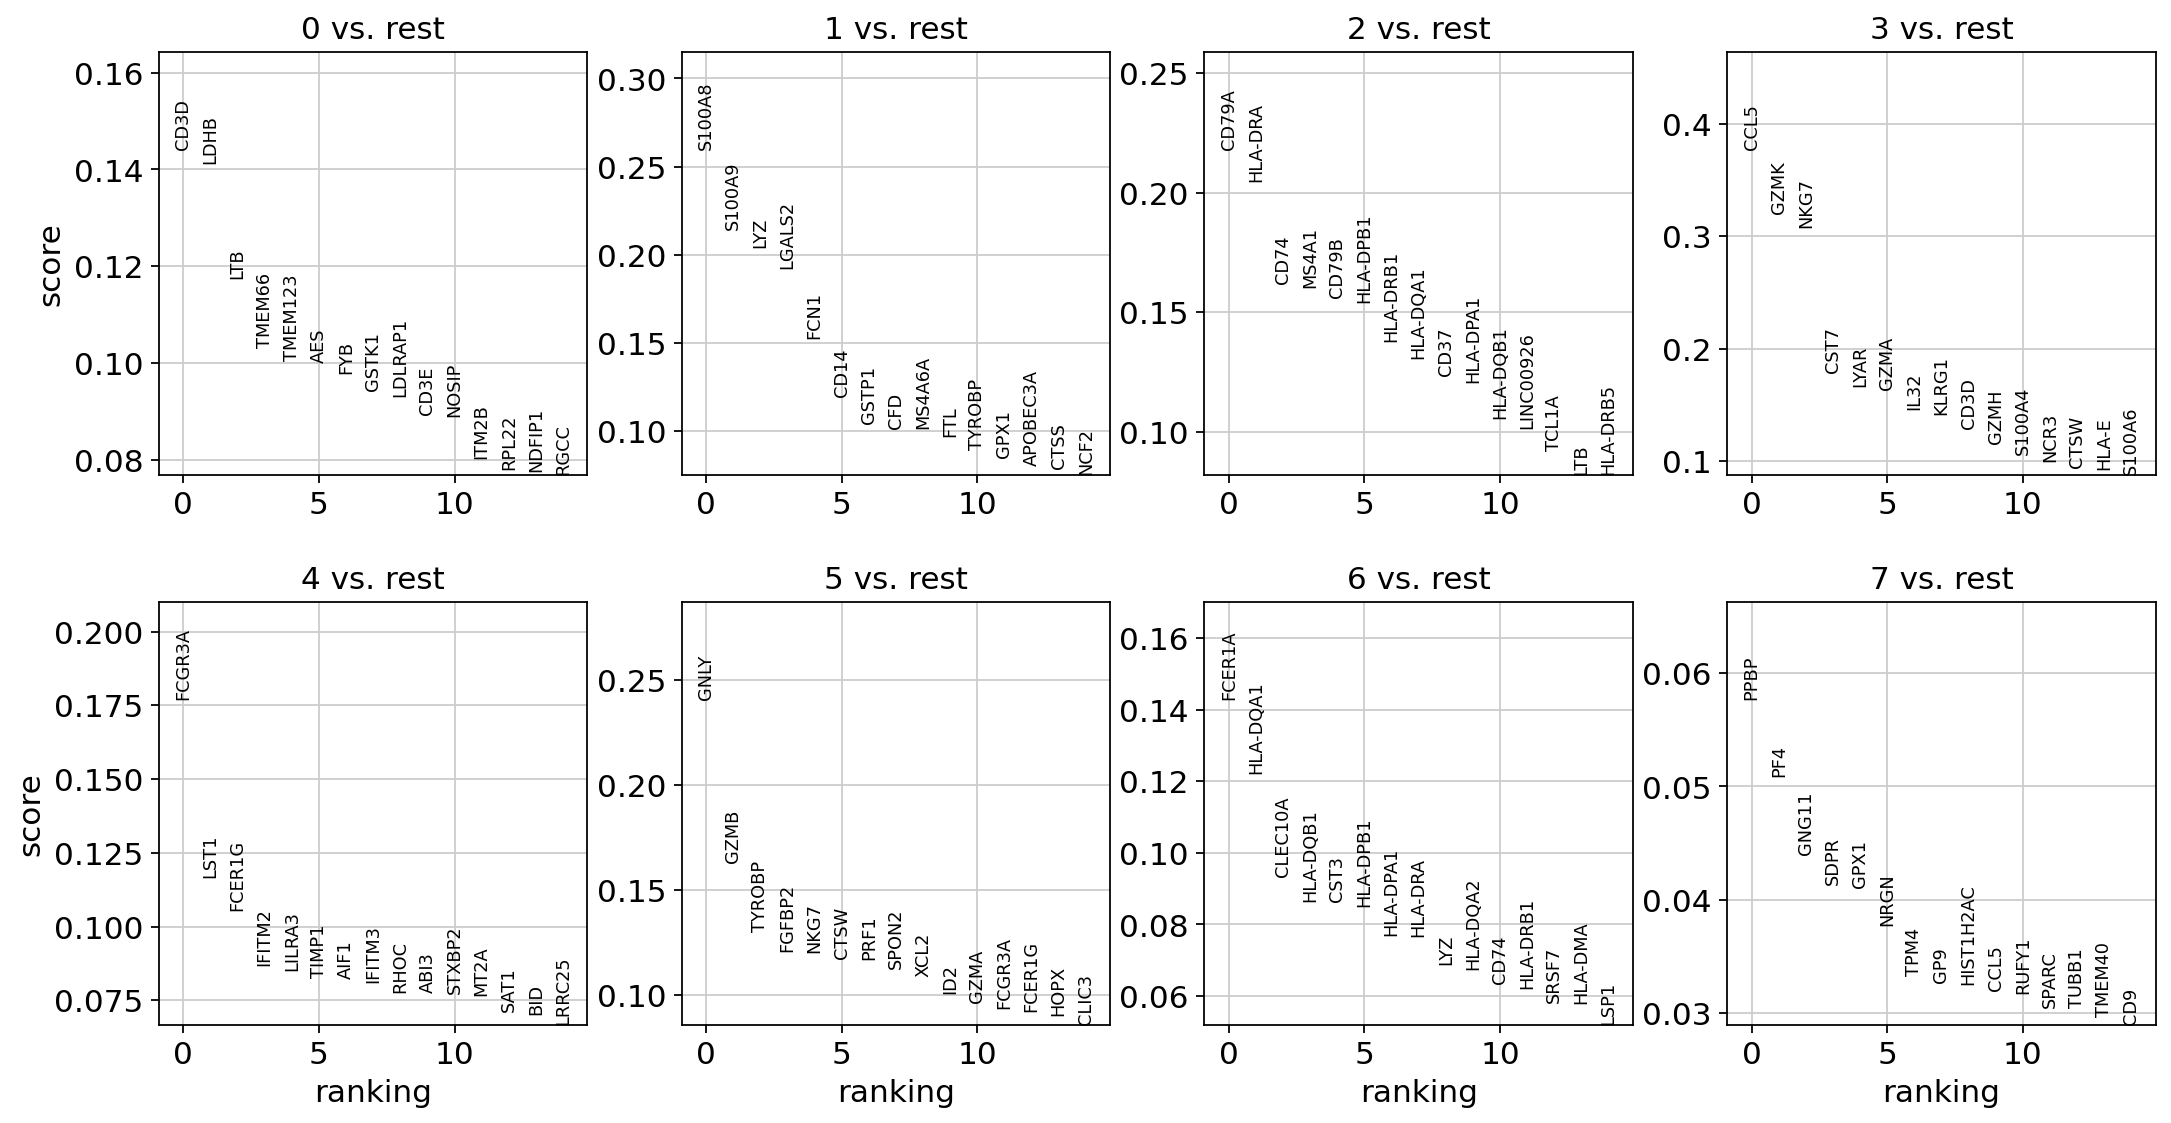

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method="logreg")
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False)

Let us also define a list of marker genes for later reference.

In [ ]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

## Listing signatures using the results of the Wilcoxon's test

We use the results of the Wilcoxon's test for downstream analysis. Reload the object that has been save with the Wilcoxon Rank-Sum test result.

In [ ]:
adata = sc.read(results_file)

Show the 10 top ranked genes per cluster 0, 1, …, 7 in a dataframe.

In [ ]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

,0,1,2,3,4,5,6,7
0,LDHB,LYZ,CD74,CCL5,LST1,NKG7,HLA-DPA1,PF4
1,RPS12,S100A9,CD79A,NKG7,FCER1G,GZMB,HLA-DPB1,SDPR
2,RPS25,S100A8,HLA-DRA,B2M,AIF1,GNLY,HLA-DRA,GNG11
3,RPS27,TYROBP,CD79B,GZMA,COTL1,PRF1,HLA-DRB1,PPBP
4,RPS6,FTL,HLA-DPB1,CST7,FCGR3A,CTSW,CD74,NRGN


Get a table with the scores and groups.

In [ ]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,5_n,5_p,6_n,6_p,7_n,7_p
0,LDHB,1.350922e-223,LYZ,1.647634e-248,CD74,5.152737e-184,CCL5,9.394282e-137,LST1,1.428218e-85,NKG7,1.427704e-87,HLA-DPA1,5.422417e-21,PF4,4.722886e-10
1,RPS12,4.303411e-223,S100A9,6.791277e-246,CD79A,1.345644e-171,NKG7,2.503098e-111,FCER1G,2.597703e-82,GZMB,2.668151e-83,HLA-DPB1,7.591860e-21,SDPR,4.733899e-10
2,RPS25,6.680727e-196,S100A8,3.288995e-238,HLA-DRA,1.155738e-167,B2M,1.065035e-85,AIF1,2.525240e-79,GNLY,6.948432e-83,HLA-DRA,1.306768e-19,GNG11,4.733899e-10
3,RPS27,2.223506e-188,TYROBP,2.353508e-221,CD79B,5.366334e-155,GZMA,5.054432e-81,COTL1,2.373492e-75,PRF1,4.659871e-79,HLA-DRB1,1.865104e-19,PPBP,4.744938e-10
4,RPS6,1.079450e-183,FTL,9.048228e-214,HLA-DPB1,1.154217e-148,CST7,1.354657e-80,FCGR3A,1.776518e-73,CTSW,8.466720e-79,CD74,5.853161e-19,NRGN,4.800511e-10


Compare to a single cluster:

ranking genes
    finished (0:00:01)


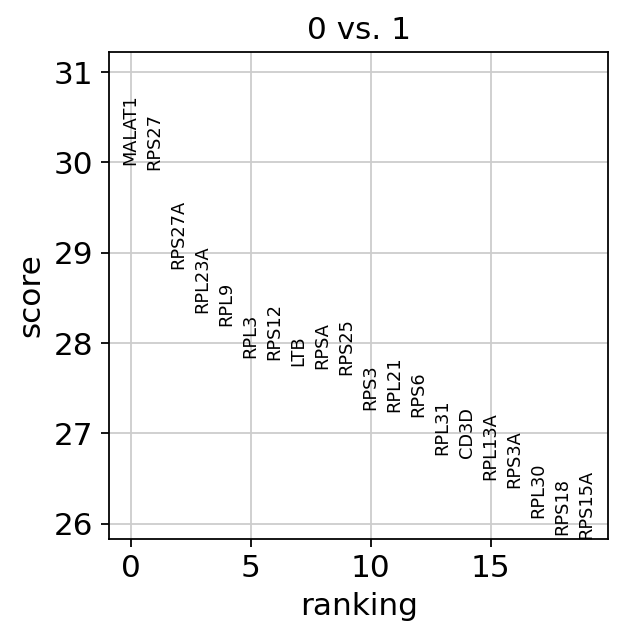

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

If we want a more detailed view for a certain group, use `sc.pl.rank_genes_groups_violin`.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


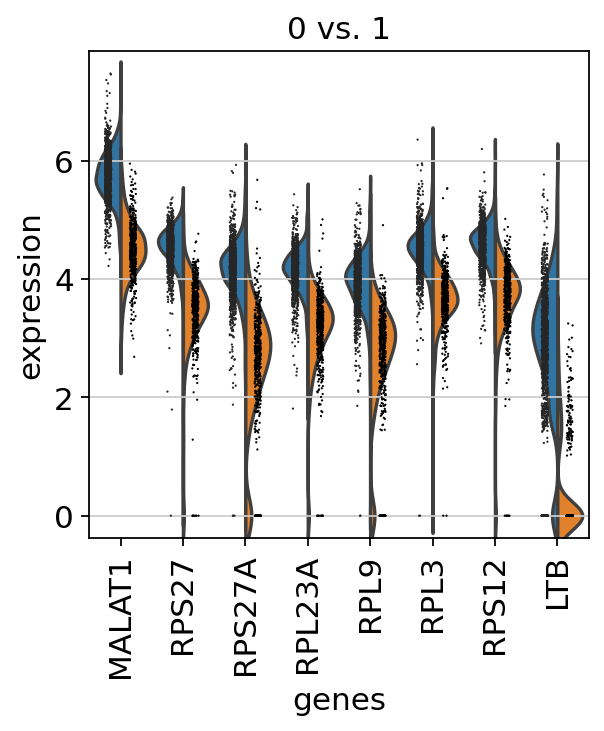

In [ ]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

If you want to compare a certain gene across groups, use the following.

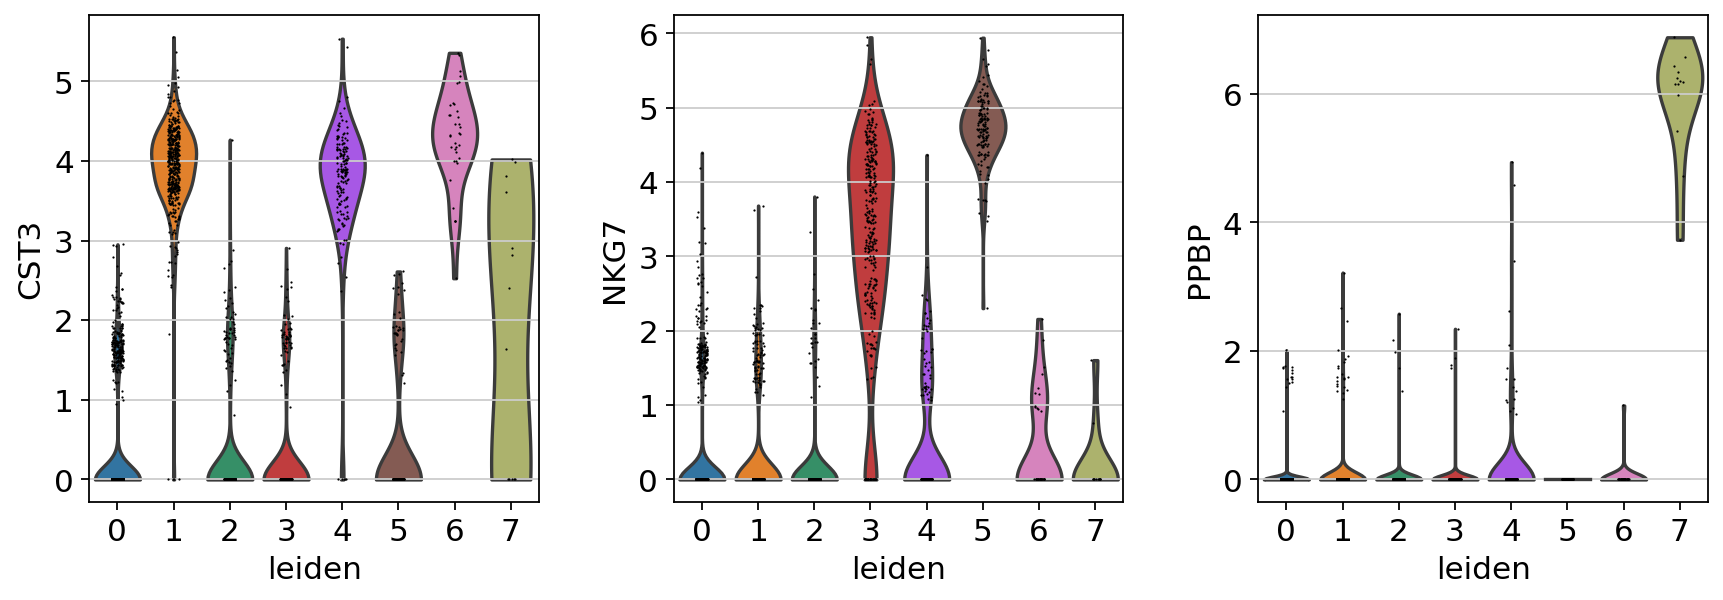

In [ ]:
sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')

Actually mark the cell types.

In [ ]:
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
adata.rename_categories('leiden', new_cluster_names)


Omitting rank_genes_groups/names as old categories do not match.
Omitting rank_genes_groups/scores as old categories do not match.
Omitting rank_genes_groups/pvals as old categories do not match.
Omitting rank_genes_groups/pvals_adj as old categories do not match.
Omitting rank_genes_groups/logfoldchanges as old categories do not match.


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


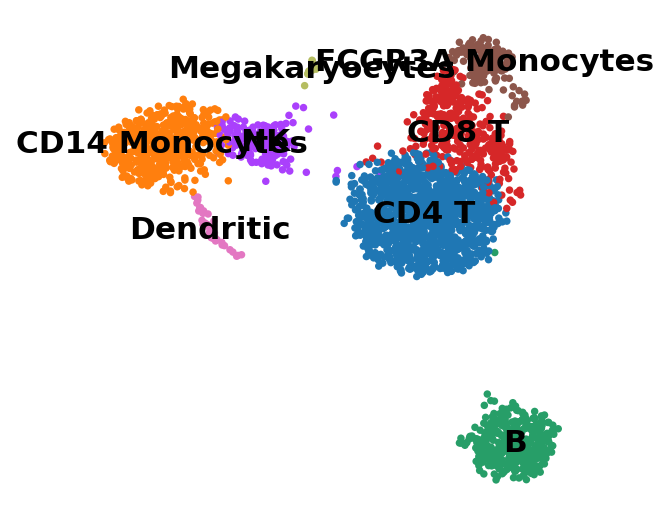

In [ ]:
# plot the UMAP
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

Now that we annotated the cell types, let us visualize the marker genes.

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


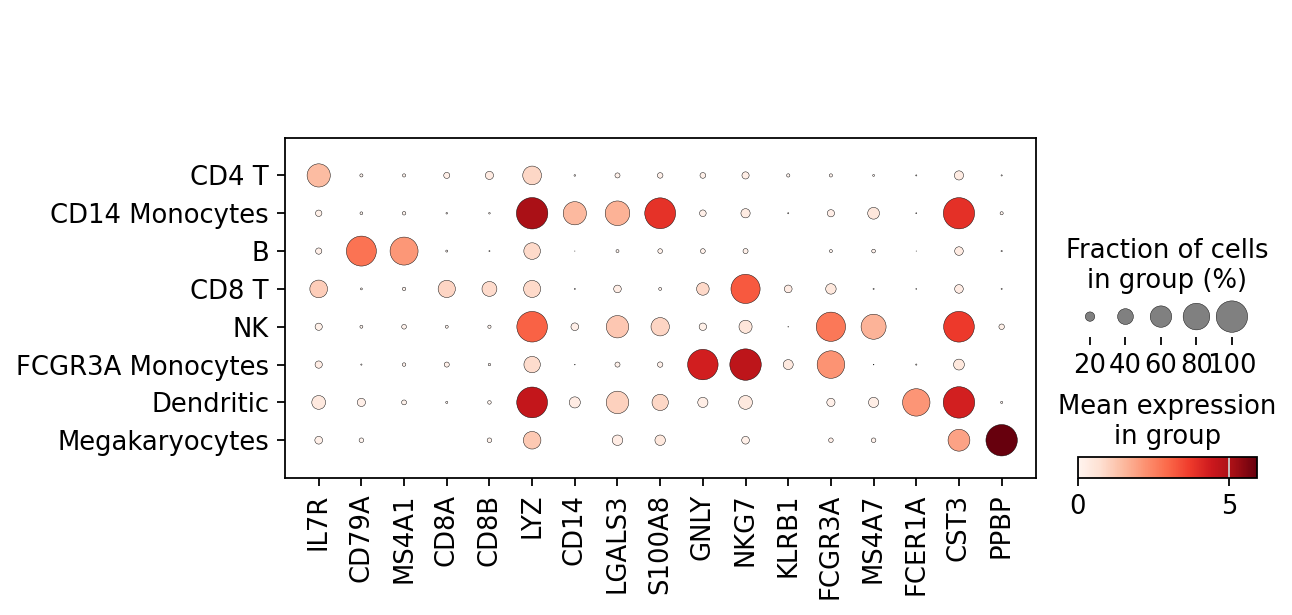

In [ ]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden');

There is also a very compact violin plot.

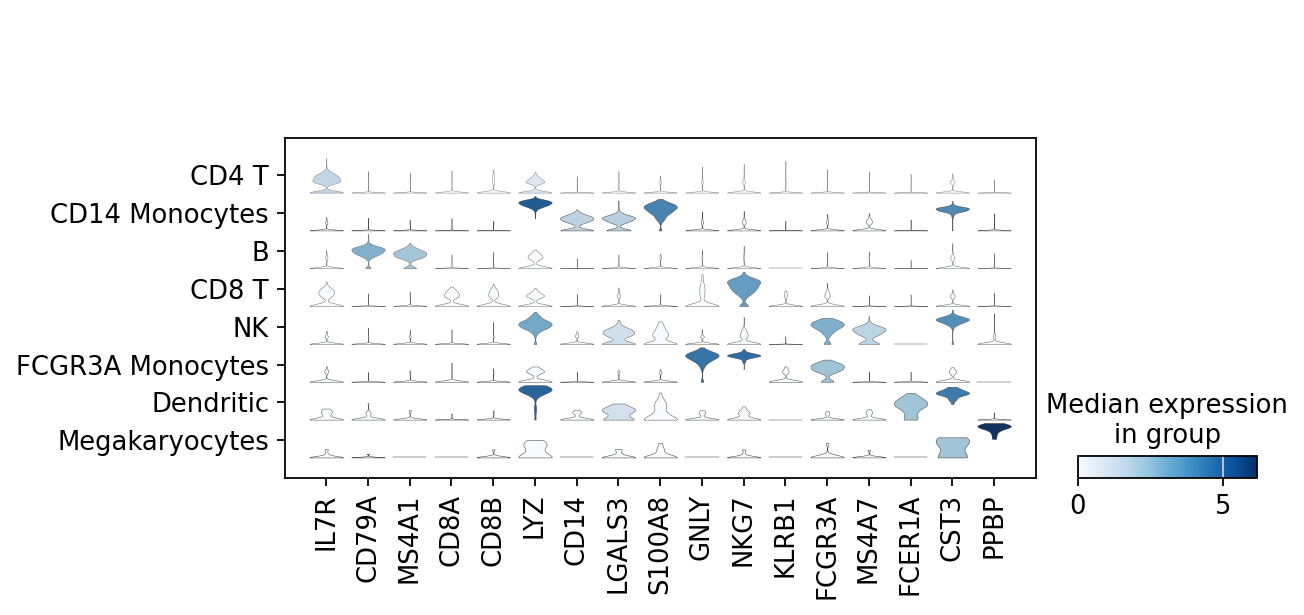

In [ ]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);

During the course of this analysis, the AnnData accumulated the following annotations.

In [ ]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

If you want to save your results:

In [ ]:
adata.write(results_file, compression='gzip')  # `compression='gzip'` saves disk space, but slows down writing and subsequent reading

Get a rough overview of the file using h5ls, which has many options - for more details see here. The file format might still be subject to further optimization in the future. All reading functions will remain backwards-compatible, though.

If you want to share this file with people who merely want to use it for visualization, a simple way to reduce the file size is by removing the dense scaled and corrected data matrix. The file still contains the raw data used in the visualizations in `adata.raw`.

In [ ]:
adata.raw.to_adata().write('./write/pbmc3k_withoutX.h5ad')

If you want to export to “csv”, you have the following options:

In [ ]:
# Export single fields of the annotation of observations
adata.obs[['n_counts', 'louvain_groups']].to_csv('./write/pbmc3k_corrected_louvain_groups.csv')

# Export single columns of the multidimensional annotation
adata.obsm.to_df()[['X_pca1', 'X_pca2']].to_csv('./write/pbmc3k_corrected_X_pca.csv')

# Or export everything except the data using `.write_csvs`.
 #Set `skip_data=False` if you also want to export the data.
adata.write_csvs(results_file[:-5],)

KeyError: ignored